In [1]:
import os
os.chdir("..")
assert 'PromptDataExtract' in os.getcwd()

In [2]:
# Load settings
from backend import sett, postgres
from backend.utils.frame import Frame
sett.load_settings()
postgres.load_settings()

Load OK: settings.yaml


In [3]:
# Connect to database
db = postgres.connect('polylet')

NOTE  -- postgres_ Connected to PostGres DB: polylet (took 0.048 s)


In [4]:
import json
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
try:
    plt.style.use("PromptDataExtraction/notebooks/matplotlib.mplstyle")
except:
    try:
        plt.style.use("~/matplotlib.mplstyle")
    except: pass

In [5]:
def execute(sql, **kwargs) -> pd.DataFrame:
    """ Query the database using raw sql.
        Return a pandas dataframe containing the results.
    """
    results = postgres.raw_sql(sql, kwargs)
    if not results:
        return None
    return pd.DataFrame.from_records(results, columns=results[0]._fields)

In [6]:
method = postgres.raw_sql("""
    Select * From extraction_methods 
    Where dataset = 'data1' and name like '%-gpt35-sel1k';
""")
method

[Row(name='h2_perm-gpt35-sel1k', dataset='data1', model='gpt-3.5-turbo', api='openai', para_subset='h2_perm-ner-sel1k-no-unit', extraction_info={'user': 'sonakshi', 'shot_selector': 'random', 'n_shots': 1, 'api_retry_delay': 60, 'delay_multiplier': 2.0, 'max_api_retries': 1, 'api_request_delay': 0.2, 'temperature': 0.001, 'prompt': "Extract all hydrogen or H2 permeability values in JSONL format with 'material', 'property', 'value', 'condition' columns.", 'shot_nrecords': 2, 'shot_keywords': 'false', 'property': None, 'prompt_id': 0}, id=110, date_added=datetime.datetime(2023, 10, 9, 14, 27, 59, 399824, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=72000)))),
 Row(name='lcst-gpt35-sel1k', dataset='data1', model='gpt-3.5-turbo', api='openai', para_subset='lcst-ner-sel1k-no-unit', extraction_info={'user': 'sonakshi', 'shot_selector': 'random', 'n_shots': 1, 'api_retry_delay': 60, 'delay_multiplier': 2.0, 'max_api_retries': 1, 'api_request_delay': 0.2, 'temperature': 0.001, 

In [7]:
# Number of materials extracted.
execute("""
      SELECT count(*) FROM extracted_materials em
      WHERE em.method_id >= 175 and em.method_id <= 202
      """)

,count
0,72606


In [8]:
# Number of properties extracted.
execute("""
        SELECT em.name, count(*) FROM extracted_properties ep
        JOIN extraction_methods em ON em.id = ep.method_id
        WHERE ep.method_id >= 175 and ep.method_id <= 202
        group by em.name, ep.method_id;
        """)

,name,count
0,bandgap-gpt35-similar-full,14707
1,dc-gpt35-similar-full,13507
2,hardness-gpt35-similar-full,997
3,ionic_cond-gpt35-similar-full,12366
4,td-gpt35-similar-full,649
5,tg-gpt35-similar-full,15519
6,tm-gpt35-similar-full,14875
7,ts-gpt35-similar-full,165
8,wca-gpt35-similar-full,177
9,ym-gpt35-similar-full,17421


### Tg extracted data

In [9]:
# Number of materials extracted.
execute("""
      SELECT count(*) FROM extracted_materials em
      WHERE em.method_id = 180
      """)

,count
0,13463


In [11]:
# Number of properties extracted.
execute("""
        SELECT count(*) FROM extracted_properties ep
        WHERE ep.method_id = 180
        --group by ep.method_id;
        """)

,count
0,15519


In [15]:
tg_data = execute("""
        SELECT ep.numeric_value FROM extracted_properties ep
        WHERE ep.method_id = 180
        --group by ep.method_id;
        """)

tg_data

,numeric_value
0,88.0
1,89.0
2,105.0
3,145.0
4,151.0
...,...
15514,200.0
15515,207.0
15516,247.0
15517,-13.7


In [ ]:
print(min(tg_data['numeric_value'])
print(max(tg_data['numeric_value']))

156320.0

(-2000.0, 2000.0)

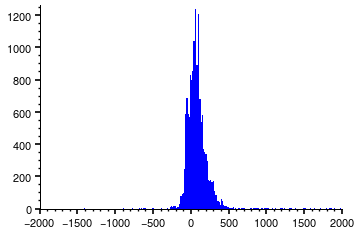

In [32]:
plt.hist(tg_data, bins=10000, color='blue')
plt.xlim(-2000, 2000)